In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [147]:
ai_df = pd.read_csv("AI_index_db.csv")
companies_df = pd.read_csv("AI_Companies.csv")

## Mapping AI Index scores

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_31567/1941598823.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



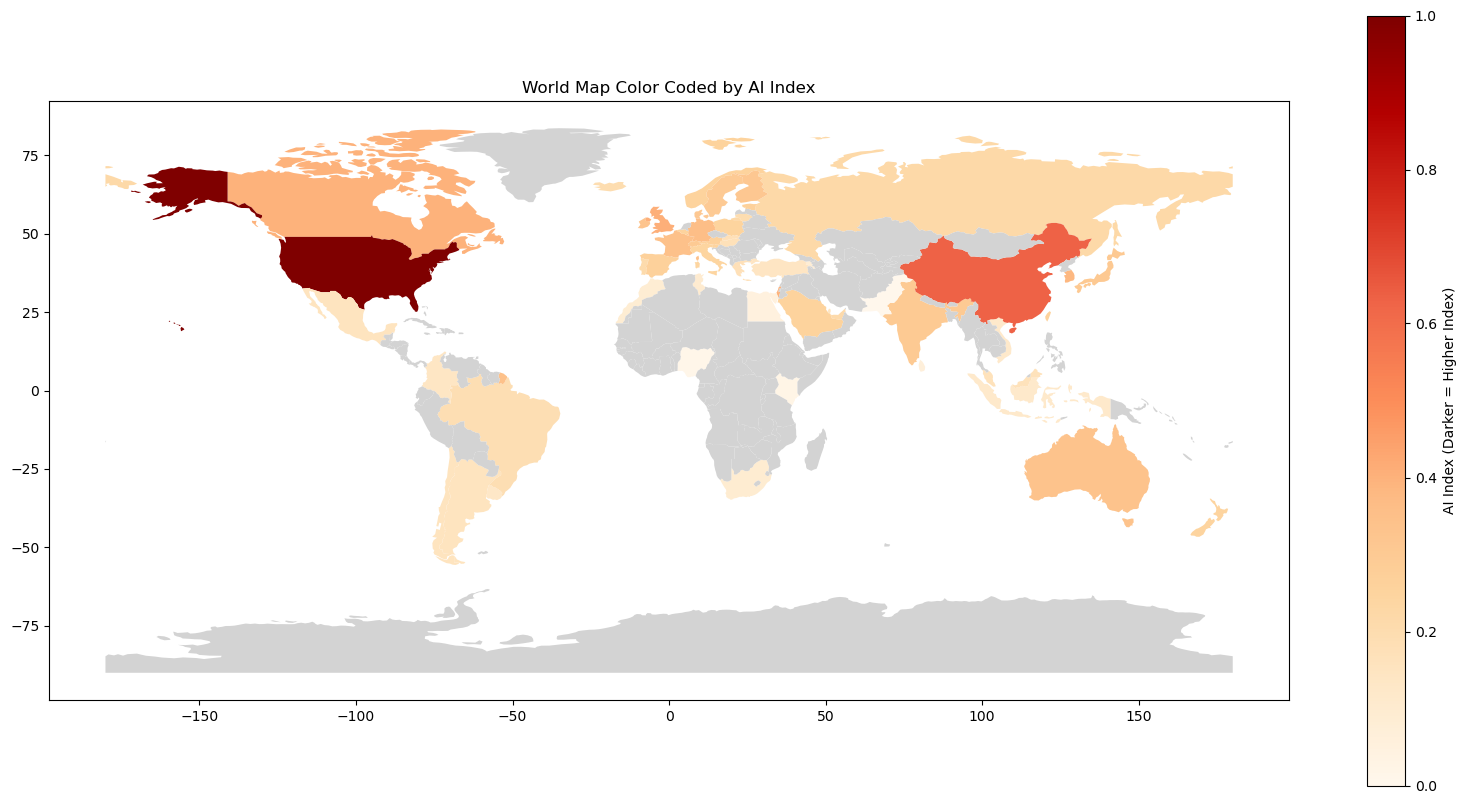

In [148]:
ai_df['Normalized Score'] = ai_df['Total score'] / ai_df['Total score'].max()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_merged = world.set_index('name').join(ai_df.set_index('Country'))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world_merged.plot(column='Normalized Score', ax=ax, legend=True,
                 legend_kwds={'label': "AI Index (Darker = Higher Index)"},
                 missing_kwds={'color': 'lightgrey'},
                 cmap='OrRd')  

plt.title('World Map Color Coded by AI Index')
plt.show()

In [149]:
ai_df = ai_df.sort_values(by=['Normalized Score'], ascending=False)

## Company Maps

In [150]:
companies_df = companies_df.drop('Unnamed: 7', axis=1)

In [151]:
companies_df = companies_df.drop(companies_df.index[2261])

In [152]:
companies_df['Location'] = companies_df['Location'].fillna(value='unknown, unknown')

In [153]:
countries = companies_df['Location'].to_list()
countries_split = [ele.split(',')[-1].strip() for ele in countries]

In [154]:
import json

In [155]:
usa_state_codes_json = json.load(open('/Users/kei/Desktop/fall23/data mining/finalproject/us-states.json'))

In [156]:
usa_state_codes = [ele['id'] for ele in usa_state_codes_json['features']]
for i,code in enumerate(countries_split):
    if code in usa_state_codes:
        countries_split[i] = 'United States'
    elif code == 'DC':
        countries_split[i] = 'United States'
    else:
        continue
companies_df['country'] = countries_split

In [73]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [157]:
import pycountry

iso_countries_ip = companies_df['country'].to_list()

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = []
for country in iso_countries_ip:
        if country == 'Vietnam':
            codes.append('VNM')
        elif country == 'Tanzania':
            codes.append('TZA')
        elif country == 'Czech Republic':
            codes.append('CZE')
        elif country == 'Moldova':
            codes.append('MDA')
        elif country == 'South Korea':
            codes.append('KOR')
        else:
            c = countries.get(country)
            codes.append(c)

companies_df['country_iso_codes']  = codes

In [158]:
companies_df['country_iso_codes'] = companies_df['country_iso_codes'].fillna('USA')

In [159]:
ai_companies_countries = companies_df[['country_iso_codes']]
ai_companies_countries = ai_companies_countries.dropna()
ai_companies_countries_count = ai_companies_countries['country_iso_codes'].value_counts().to_dict()
ai_companies_countries_count_df = pd.DataFrame(ai_companies_countries_count.items(),columns=['country_codes','count'])
ai_companies_countries_count_df['color'] = ['Count']*90
ai_companies_countries_count_df['country_name'] = ai_companies_countries_count_df['country_codes'].apply(lambda x: pycountry.countries.get(alpha_3=x).name)

In [160]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_31567/3926210268.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [161]:
merged_data = world.merge(ai_companies_countries_count_df, left_on='iso_a3', right_on='country_codes', how='left')

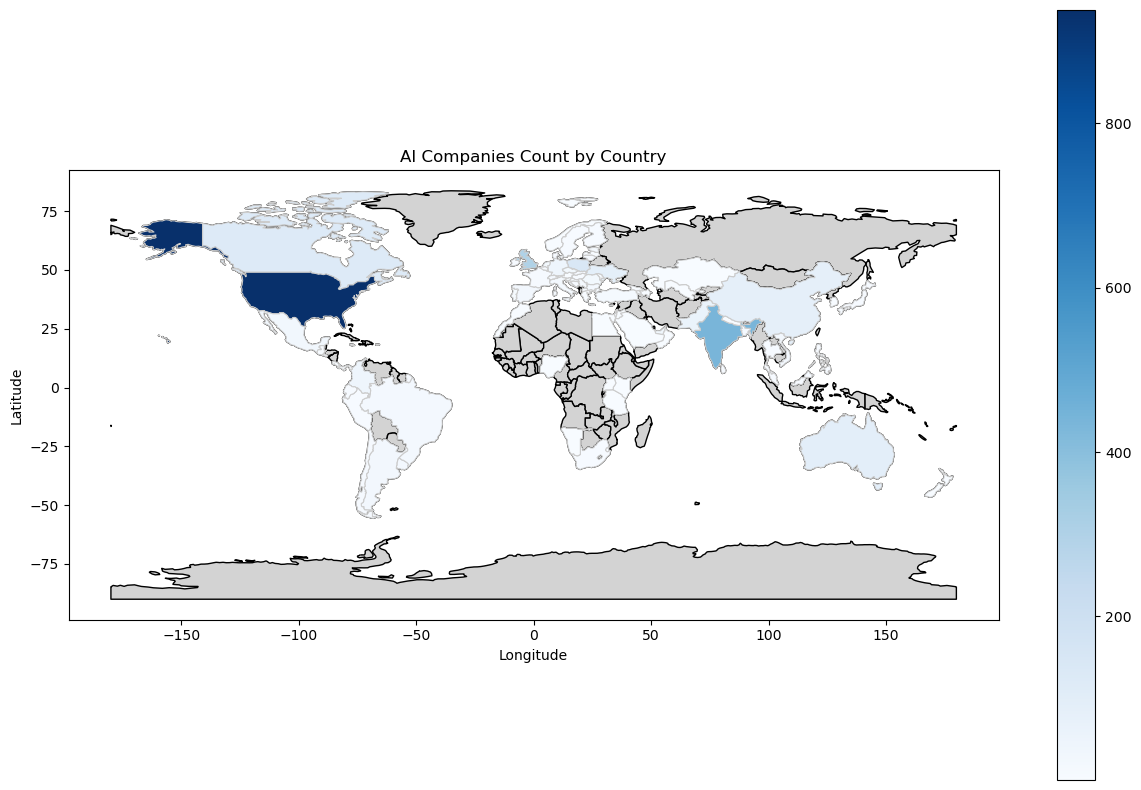

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(ax=ax, color='lightgrey', edgecolor='black')

merged_data.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('AI Companies Count by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Top 10 based on AI Index on Political regime

In [172]:
top_10_ai = ai_df.nlargest(10, 'Normalized Score')
top_10_ai

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,Normalized Score
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy,1.0000
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy,0.6292
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy,0.4093
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy,0.4019
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy,0.3989
5,Singapore,39.38,84.30,43.15,37.67,22.55,79.82,15.07,38.67,Asia-Pacific,Rising stars,High,Electoral democracy,0.3867
6,South Korea,14.54,85.23,68.86,26.66,77.25,87.50,5.41,38.60,Asia-Pacific,Rising stars,High,Liberal democracy,0.3860
7,The Netherlands,33.83,81.99,88.05,25.54,30.17,62.35,4.97,36.35,Europe,Rising stars,High,Liberal democracy,0.3635
8,Germany,27.63,77.22,70.22,35.84,24.79,84.65,8.29,36.04,Europe,Traditional champions,High,Liberal democracy,0.3604
9,France,28.32,77.15,80.02,25.48,21.44,91.20,7.65,34.42,Europe,Traditional champions,High,Liberal democracy,0.3442


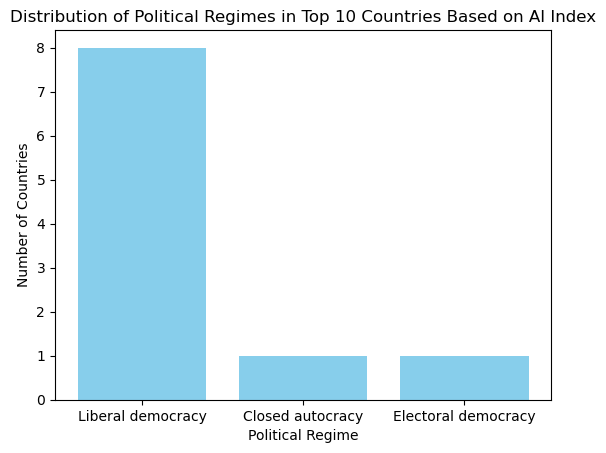

In [173]:
plt.bar(top_10_ai['Political regime'].value_counts().index, top_10_ai['Political regime'].value_counts().values, color='skyblue')
plt.xlabel('Political Regime')
plt.ylabel('Number of Countries')
plt.title('Distribution of Political Regimes in Top 10 Countries Based on AI Index')
plt.show()

## Correlation Matrix on Top 10 Countries Based on AI index

In [174]:
label_encoder = LabelEncoder()
top10_comp_df['Cluster'] = label_encoder.fit_transform(top10_comp_df['Cluster'])
top10_comp_df['Income group'] = label_encoder.fit_transform(top10_comp_df['Income group'])
top10_comp_df['Political regime'] = label_encoder.fit_transform(top10_comp_df['Political regime'])
top10_comp_df['Region'] = label_encoder.fit_transform(top10_comp_df['Region'])

top10_comp_df = top10_comp_df.drop('Country', axis=1)

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_31567/1075967518.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_31567/1075967518.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_b/xdzxy1w53hj6pc7dfn4n_1t00000gn/T/ipykernel_31567/1075967518.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<Axes: >

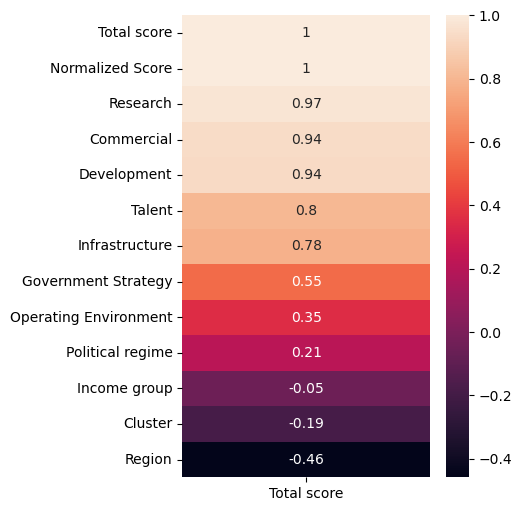

In [175]:
corr = top10_comp_df.corr()[['Total score']].sort_values(by='Total score', ascending=False)
fig, ax = plt.subplots(figsize=(4,6))   
sns.heatmap(corr,ax=ax, annot=True)